### Jan Król - praca domowa 3

Tematem mojej 3. pracy domowej jest przetwarzenie tekstu. Opieram się na pobranych tweetach #ukraine dotyczących inwazji Rosji na Ukrainę 2022. Pobrałem je przy użyciu paczki snscrape.

### Import bibliotek

In [1]:
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import datetime

[nltk_data] Downloading package stopwords to /home/jan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Pobranie danych

Poniżej prezentuję oryginalny kod za pomocą, którego ściągnąłem tweety. Ponieważ było ich bardzo dużo i ich pobranie zajmowało około pół godziny zapisałem je wraz z czasami publikacji kolejno do plików tweets.txt i dates.txt

In [3]:
#tweets = []
# t = open("tweets.txt", "at")
# d = open("dates.txt", "at")
#def filter_breaklines(tweet):
    #new_tweet = ""
    #for i in tweet:
        #if i != "\n":
            #new_tweet += i
    #return new_tweet

#for idx, tweet in enumerate(sntwitter.TwitterSearchScraper("ukraine lang:en since:{} until:{}".format(datetime.date(2022, 2, 23), datetime.date(2022, 2, 25))).get_items()):
    #if idx == 30000:
        #break
    #tweets.append((tweet.rawContent, tweet.date))
    #t.write(filter_breaklines(tweet.rawContent)+"\n")
    #d.write(tweet.date.strftime("%y-%m-%d,%H:%M:%S")+"\n")
    
#t.close()
tweets = open("tweets.txt", "rt").readlines()


### Preprocessing

Przed rozpoczęciem analizy tweetów poddaje je obróbce opierając się na modelu Bag of Words. Obejmuje on kolejno: rozbicie tweetów na słowa (tokenizacja), usunięcie nic nie znaczących słów (stop words), usuwanie odmian słów (lematyzacja) oraz usunięcie symboli nie będących literami.

In [5]:
# Tokenizacja
nltk.download("punkt")
tweets_tokenized = [nltk.word_tokenize(i) for i in tweets]
# Stop words
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
tweets_stop_words = []
for tweet in tweets_tokenized:
    filtered_tweet_tokens = []
    for word in tweet:
        if word not in stop_words:
            filtered_tweet_tokens.append(word)
    tweets_stop_words.append(filtered_tweet_tokens)
# Lematyzacja
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
lemetized_tweets = []
for tweet in tweets_stop_words:
    lemetized_tokens = [lemmatizer.lemmatize(word) for word in tweet]
    lemetized_tweets.append(lemetized_tokens)
# Niepotrzebne znaki
filtered_tweets = []
for tweet in lemetized_tweets:
    filtered = []
    for word in tweet:
        if word.isalnum():
            filtered.append(word)
    filtered_tweets.append(filtered)
preprocessed_tweets = filtered_tweets

[nltk_data] Downloading package punkt to /home/jan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Due', 'Covid', 'Ukraine', 'Russia', 'war', 'held']


### NLTK-Vader

Po przetworzeniu tweetów rozpoczynam ocenianie tweetów według poziomu ich pozytywności, negatywności i neutralności używając biblioteki NLTK-Vader. 

In [8]:
nltk.download('vader_lexicon')
sentim_analyzer = SentimentIntensityAnalyzer()
nltk_result = []
for tweet in preprocessed_tweets:
    score_nltk = sentim_analyzer.polarity_scores(" ".join(tweet))
    nltk_result.append((score_nltk, tweet))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Text2Emotion

Kolejną biblioteką, której używam w projekcie jest Text2Emotion. Pozwala oceniać tweety według kilku poziomów emocji: złość, strach, szczęście, smutek i zaskoczenie.

In [11]:
t2e_result = []
for tweet in preprocessed_tweets:
    score_t2e = te.get_emotion(" ".join(tweet))
    t2e_result.append((score_t2e, tweet))

({'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}, ['Due', 'Covid', 'Ukraine', 'Russia', 'war', 'held'])


### Chmura tweetów pozytywnych dla NLTK-Vader

Poniżej zaprezentowałem dwie chmury tagów pozytywnych i negatywnych według NLTK-Vader. Zdefiniowałem w tym celu własną funkcję do generowania chmur o nazwie "nltk_word_cloud". Tweet uznaję za pozytywny jeżeli wartość pola "compound" jest większa niż 0.9 i analogicznie za negatyny uznaję, gdy ta wartość spada poniżej -0.9. W chmurach widać wyraźnie, które tagi mają zabarwienie pozytywne np. "love", "peace", "support", a które negatywne np. "invasion", "killed" lub "fuck".

In [55]:
def nltk_word_cloud(isPositive):
    tweets = []
    if isPositive:
        for tweet in nltk_result:
            if tweet[0]["compound"] > 0.9:
                tweets.append(tweet)
    else:
        for tweet in nltk_result:
            if tweet[0]["compound"] < -0.9:
                tweets.append(tweet)
    comment_words = ""
    for word in tweets:
        comment_words += " ".join(word[1])+" "
    wordcloud = WordCloud(width = 300, height = 300,
                    background_color ='black',
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

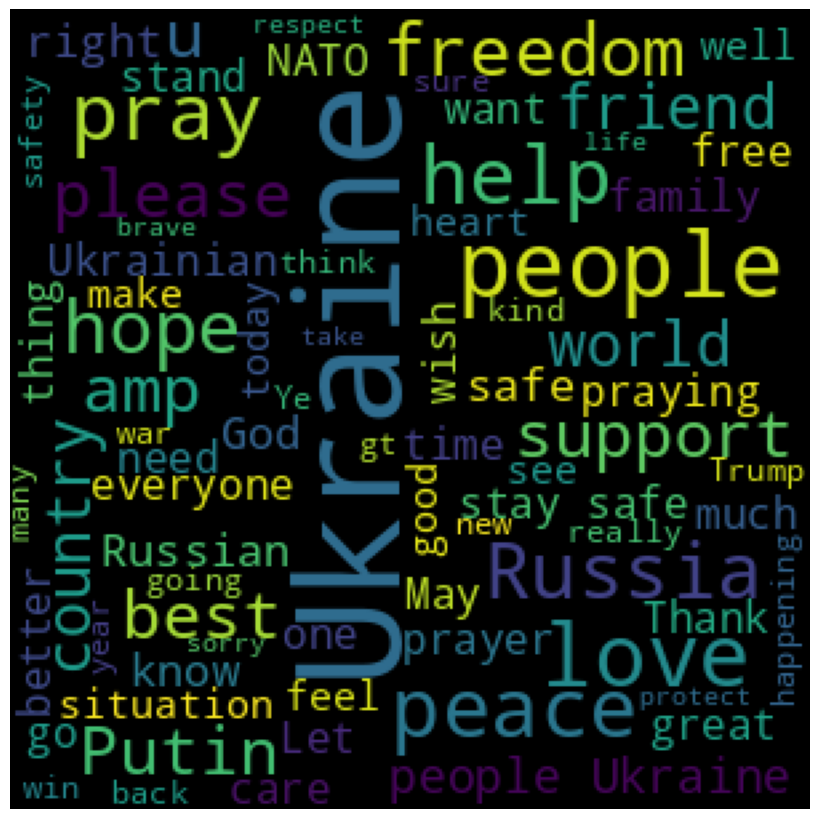

In [56]:
nltk_word_cloud(True)


### Chmura tweetow negatywnych dla NLTK-Vader

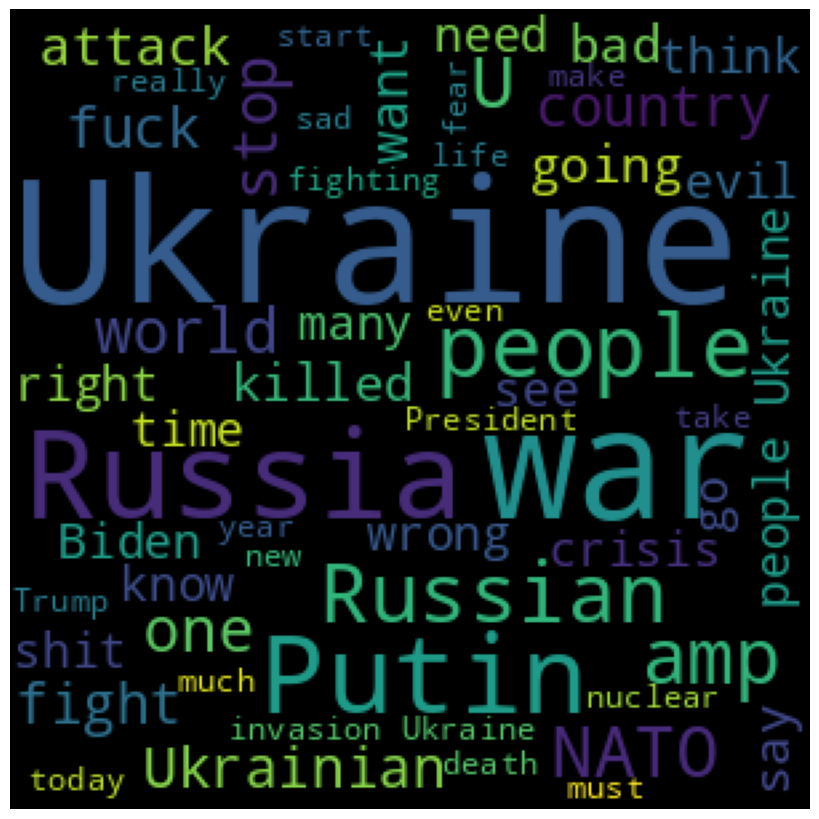

In [57]:
nltk_word_cloud(False)

### Chmura tweetów dla Text2Emotion

W sposób analogiczny tworzę chmury tagów dla narzędzia Text2Emotion. Tutaj również można zauważyć związek między ładunkiem emocjonalnym tweetu, a kryterium stosowanym przez t2e.  

In [53]:
def t2e_word_cloud(property):
    tweets = []
    for tweet in t2e_result:
        if tweet[0][property] > 0:
            tweets.append(tweet)
    comment_words = ""
    for word in tweets:
        comment_words += " ".join(word[1])+" "
    wordcloud = WordCloud(width = 300, height = 300,
                    background_color ='black',
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

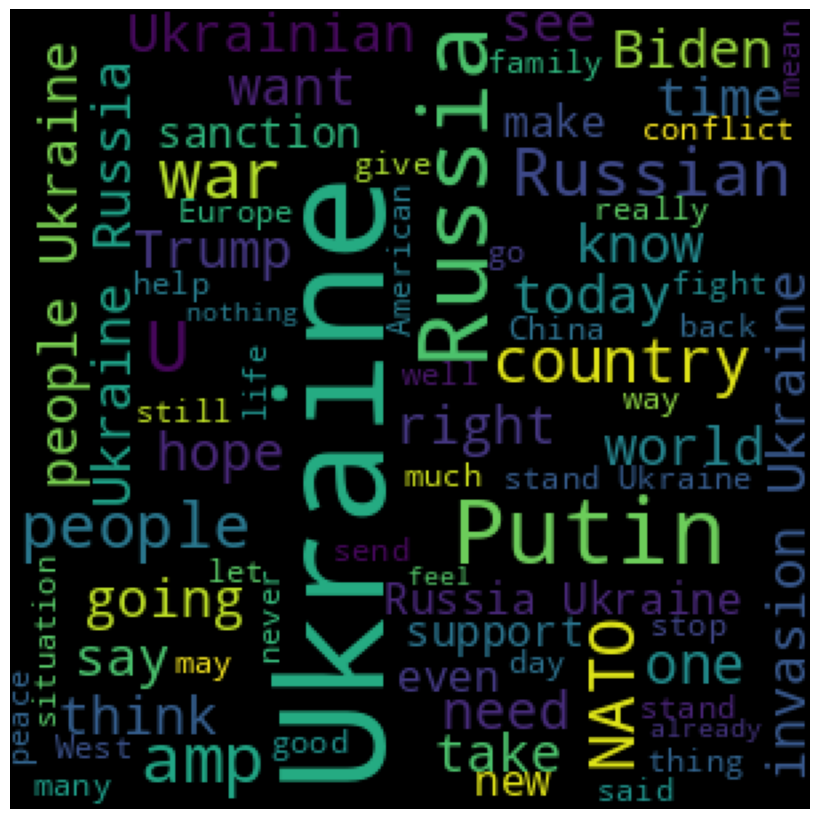

In [54]:
#t2e_word_cloud("Happy")
#t2e_word_cloud("Angry")
#t2e_word_cloud("Surprise")
#t2e_word_cloud("Sad")
t2e_word_cloud("Fear")

### Wykres nastawienia użytkowników dla NLTK-Vader

Poniżej sporządzone wykresy nastawienia użytkowników Twittera w zależności od czasu dla obu bibliotek.

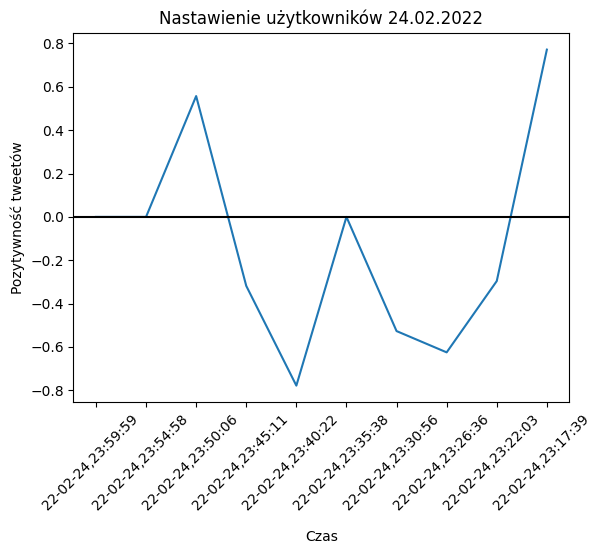

In [51]:
dates = open("dates.txt", "rt").readlines()
xpoints = []
ypoints = []
for idx in range(len(nltk_result)):
    if idx % 3000 == 0:
        xpoints.append(dates[idx])
        ypoints.append(nltk_result[idx][0]["compound"])
plt.plot(xpoints, ypoints)
plt.xticks(rotation=45)
plt.xlabel('Czas')
plt.ylabel('Pozytywność tweetów')
plt.title('Nastawienie użytkowników 24.02.2022')
plt.axhline(0, color='black')
plt.show()



### Wykres nastawienia użytkowników dla Text2Emotion

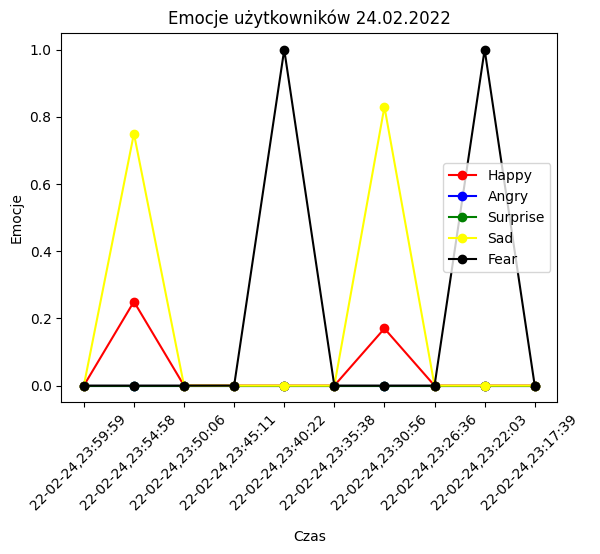

In [59]:
happy = []
angry = []
surprise = []
sad = []
fear = []
for idx in range(len(t2e_result)):
    if idx % 3000 == 0:
        happy.append(t2e_result[idx][0]["Happy"])
        angry.append(t2e_result[idx][0]["Angry"])
        surprise.append(t2e_result[idx][0]["Surprise"])
        sad.append(t2e_result[idx][0]["Sad"])
        fear.append(t2e_result[idx][0]["Fear"])
plt.plot(xpoints, happy, color = "red", marker = "o", label = "Happy")
plt.plot(xpoints, angry, color = "blue", marker = "o", label = "Angry")
plt.plot(xpoints, surprise, color = "green", marker = "o", label = "Surprise")
plt.plot(xpoints, sad, color = "yellow", marker = "o", label = "Sad")
plt.plot(xpoints, fear, color = "black", marker = "o", label = "Fear")
plt.xticks(rotation = 45)
plt.xlabel('Czas')
plt.ylabel('Emocje')
plt.title('Emocje użytkowników 24.02.2022')
plt.legend()
plt.show()